In [1]:
require(cowplot)
require(data.table)
require(ggplot2)
require(ggpubr)
require(pbapply)
pboptions(type="timer")
require(viridis)

Loading required package: cowplot

Loading required package: data.table

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend


Loading required package: pbapply

Loading required package: viridis

Loading required package: viridisLite



In [2]:
root = "../data/strip_of_tissue"
nthreads=10

In [3]:
list.files(file.path(root, "raw"))

[1] "MP_snRNAseq_filt_subclass.csv" "spots_non_DW.csv.gz"

In [4]:
list.files(file.path(root, "dw"))

[1] "MP_snRNAseq_filt_subclass.csv" "spots_DW.fov_028.csv.gz"      
[3] "spots_DW.fov_029.csv.gz"       "spots_DW.fov_030.csv.gz"      
[5] "spots_DW.fov_031.csv.gz"       "spots_DW.fov_032.csv.gz"      
[7] "spots_DW.fov_033.csv.gz"       "spots_DW.fov_034.csv.gz"

In [5]:
head(fread(file.path(root, "raw", "MP_snRNAseq_filt_subclass.csv")))

V1,Cell_Num,X,Y,ClassName,Prob
<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
614,615,5110.179,24576.70,Astrocyte,0.9999966
1825,1826,28618.661,25648.23,Astrocyte,0.9932002
699,700,19541.449,24664.62,Astrocyte,0.9999728
1335,1336,6673.996,25203.05,Astrocyte,0.9875642
1336,1337,9696.166,25193.09,Astrocyte,0.8060619
1842,1843,27489.178,25661.46,Astrocyte,0.9942978


In [6]:
head(fread(file.path(root, "raw", "spots_non_DW.csv.gz")))
fread(file.path(root, "raw", "spots_non_DW.csv.gz"))[, .N, by=fov]
sort(fread(file.path(root, "raw", "spots_non_DW.csv.gz"))[, unique(target)])

z,y,x,radius,spot_id,z_min,z_max,y_min,y_max,x_min,x_max,features,xc,yc,zc,target,distance,passes_thresholds,fov
<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<int>
0,2124,3798,2,0,0,1,2123,2126,3797,3800,0,617.2779,4245.208,0,,0.2631469,FALSE,28
0,2124,3650,2,1,0,1,2123,2126,3649,3652,1,593.2239,4245.208,0,,0.4419946,FALSE,28
0,2124,2669,2,2,0,1,2123,2126,2668,2671,2,433.7848,4245.208,0,,0.4298917,FALSE,28
0,2124,1695,2,3,0,1,2123,2126,1694,1697,3,275.4834,4245.208,0,,0.1805702,FALSE,28
0,2124,1582,3,4,0,1,2122,2127,1580,1585,4,257.1179,4245.208,0,,0.4863661,FALSE,28
0,2124,1577,2,5,0,1,2123,2126,1576,1579,5,256.3052,4245.208,0,,0.5192081,FALSE,28


fov,N
<int>,<int>
28,22840
29,32631
30,29490
31,21278
32,15215
33,10357
34,1903


[1] ""            "ADARB2"      "ALCAM"       "ANKRD34B"    "ANXA1"      
  [6] "ARPP21"      "CACNA2D1"    "CADM2"       "CADPS"       "CALB1"      
 [11] "CALM2"       "CBLN2"       "CDH10"       "CDH13"       "CDH9"       
 [16] "CELF2"       "CHN1"        "CMTM8"       "CNTN3"       "CNTNAP2"    
 [21] "CNTNAP4"     "COL21A1"     "COL22A1"     "COL24A1"     "COL5A2"     
 [26] "COL6A1"      "CRYM"        "CTNNA2"      "DCN"         "DPP10"      
 [31] "EDIL3"       "EGFEM1P"     "ENC1"        "ERBB4"       "ETNPPL"     
 [36] "FEZF2"       "FSTL5"       "FTH1"        "GABBR2"      "GAD1"       
 [41] "GPM6A"       "GRIA1"       "GRIA4"       "GRIK1"       "GRIK2"      
 [46] "HTR2C"       "ID3"         "IL1RAPL1"    "IQCJ-SCHIP1" "ITPR2"      
 [51] "KCNC2"       "KCNT2"       "KIT"         "KLHL5"       "LAMP5"      
 [56] "LDB2"        "LHFPL3"      "LHX6"        "LINC00507"   "LINCR-0003" 
 [61] "LRMP"        "LY86"        "MEG3"        "MIAT"        "MIR4500HG"  
 [66] "MYZAP"       "NCAM2"       "NDNF"        "NECAB1"      "NELL2"      
 [71] "NOSTRIN"     "NTM"         "NTNG1"       "NXPH1"       "NXPH2"      
 [76] "OLFM1"       "OLFM3"       "OPALIN"      "OXR1"        "PAX6"       
 [81] "PCDH15"      "PCDH7"       "PCDH9"       "PCLO"        "PDE1A"      
 [86] "PDGFRA"      "PTPRD"       "PTPRK"       "PTPRZ1"      "PVALB"      
 [91] "RELN"        "RGS12"       "RIMS2"       "RIT2"        "RORB"       
 [96] "RXFP1"       "SCHIP1"      "SCUBE1"      "SERPINE2"    "SLC17A7"    
[101] "SLC1A2"      "SLC6A1"      "SLIT2"       "SMYD1"       "SNTG1"      
[106] "SORBS2"      "SPARCL1"     "SPHKAP"      "SPOCK1"      "SPOCK3"     
[111] "STMN1"       "SULF1"       "SYNPR"       "SYT1"        "TH"         
[116] "THSD7A"      "TMEFF2"      "TMEM255A"    "TRHDE"       "VIP"        
[121] "ZMAT4"

In [7]:
i = 32
head(fread(file.path(root, "dw", sprintf("spots_DW.fov_%03d.csv.gz", i))))
fread(file.path(root, "dw", sprintf("spots_DW.fov_%03d.csv.gz", i)))[, .N, by=fov]
sort(fread(file.path(root, "dw", sprintf("spots_DW.fov_%03d.csv.gz", i)))[, unique(target)])

z,y,x,radius,spot_id,z_min,z_max,y_min,y_max,x_min,x_max,features,xc,yc,zc,target,distance,passes_thresholds,fov
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
0,2117,209,2,0,0,1,2116,2119,208,211,0,3933.968,4244.07,0,,0.1995425,FALSE,32
0,2117,191,2,1,0,1,2116,2119,190,193,1,3931.043,4244.07,0,,0.6417668,FALSE,32
0,2117,180,2,2,0,1,2116,2119,179,182,2,3929.255,4244.07,0,,0.6441321,FALSE,32
0,2117,171,2,3,0,1,2116,2119,170,173,3,3927.792,4244.07,0,,0.4399876,FALSE,32
0,2117,163,2,4,0,1,2116,2119,162,165,4,3926.492,4244.07,0,,0.5165657,FALSE,32
0,2117,126,2,5,0,1,2116,2119,125,128,5,3920.478,4244.07,0,,0.6573857,FALSE,32


fov,N
<int>,<int>
32,342062


[1] ""            "ADARB2"      "ALCAM"       "ANKRD34B"    "ANXA1"      
  [6] "ARPP21"      "CACNA2D1"    "CADM2"       "CADPS"       "CALB1"      
 [11] "CALM2"       "CBLN2"       "CDH10"       "CDH13"       "CDH9"       
 [16] "CELF2"       "CHN1"        "CMTM8"       "CNTN3"       "CNTNAP2"    
 [21] "CNTNAP4"     "COL21A1"     "COL22A1"     "COL24A1"     "COL5A2"     
 [26] "COL6A1"      "CRYM"        "CTNNA2"      "DCN"         "DPP10"      
 [31] "EDIL3"       "EGFEM1P"     "ENC1"        "ERBB4"       "ETNPPL"     
 [36] "FEZF2"       "FSTL5"       "FTH1"        "GABBR2"      "GAD1"       
 [41] "GPM6A"       "GRIA1"       "GRIA4"       "GRIK1"       "GRIK2"      
 [46] "HTR2C"       "ID3"         "IL1RAPL1"    "IQCJ-SCHIP1" "ITPR2"      
 [51] "KCNC2"       "KCNT2"       "KIT"         "KLHL5"       "LAMP5"      
 [56] "LDB2"        "LHFPL3"      "LHX6"        "LINC00507"   "LINCR-0003" 
 [61] "LRMP"        "LY86"        "MEG3"        "MIAT"        "MIR4500HG"  
 [66] "MYZAP"       "NCAM2"       "NDNF"        "NECAB1"      "NELL2"      
 [71] "NOSTRIN"     "NTM"         "NTNG1"       "NXPH1"       "NXPH2"      
 [76] "OLFM1"       "OLFM3"       "OPALIN"      "OXR1"        "PAX6"       
 [81] "PCDH15"      "PCDH7"       "PCDH9"       "PCLO"        "PDE1A"      
 [86] "PDGFRA"      "PTPRD"       "PTPRK"       "PTPRZ1"      "PVALB"      
 [91] "RELN"        "RGS12"       "RIMS2"       "RIT2"        "RORB"       
 [96] "RXFP1"       "SCHIP1"      "SCUBE1"      "SERPINE2"    "SLC17A7"    
[101] "SLC1A2"      "SLC6A1"      "SLIT2"       "SMYD1"       "SNTG1"      
[106] "SORBS2"      "SPARCL1"     "SPHKAP"      "SPOCK1"      "SPOCK3"     
[111] "STMN1"       "SULF1"       "SYNPR"       "SYT1"        "TH"         
[116] "THSD7A"      "TMEFF2"      "TMEM255A"    "TRHDE"       "VIP"        
[121] "ZMAT4"

In [8]:
cell_data = rbindlist(pblapply(c("dw", "raw"), function(image_type) {
    d = fread(file.path(root, image_type, "MP_snRNAseq_filt_subclass.csv"))
    d$image_type = image_type
    return(d)
}, cl=nthreads))

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  


In [9]:
cell_data[, V1 := NULL]

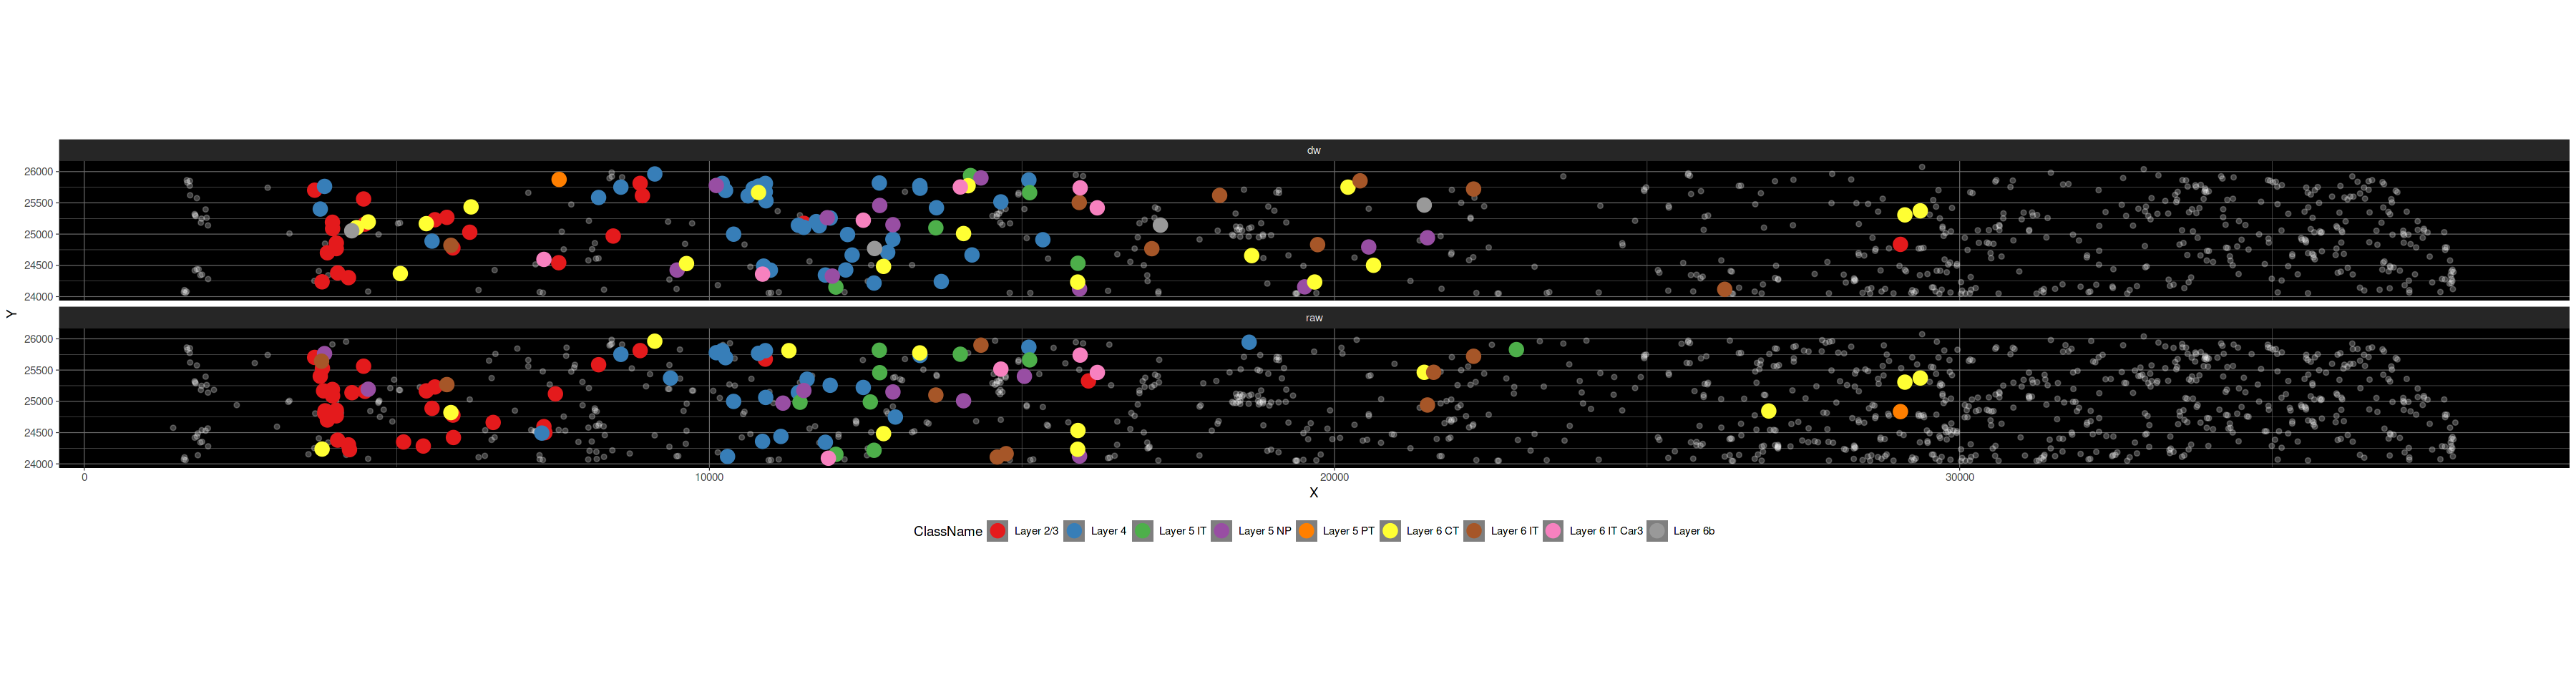

In [10]:
options(repr.plot.width=30, repr.plot.height=8)
ggplot(cell_data[ClassName != "Zero"][grepl("Layer", ClassName)], aes(X, Y, color=ClassName)) +
    geom_point(data=cell_data[ClassName == "Zero"], color="white", alpha=.25) +
    geom_point(size=5) + theme_dark() +
    theme(legend.position="bottom") + coord_fixed() + guides(color=guide_legend(nrow=1)) +
    theme(panel.background=element_rect(fill="black")) +
    facet_wrap(~image_type, nrow=2) + scale_color_brewer(palette="Set1")

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


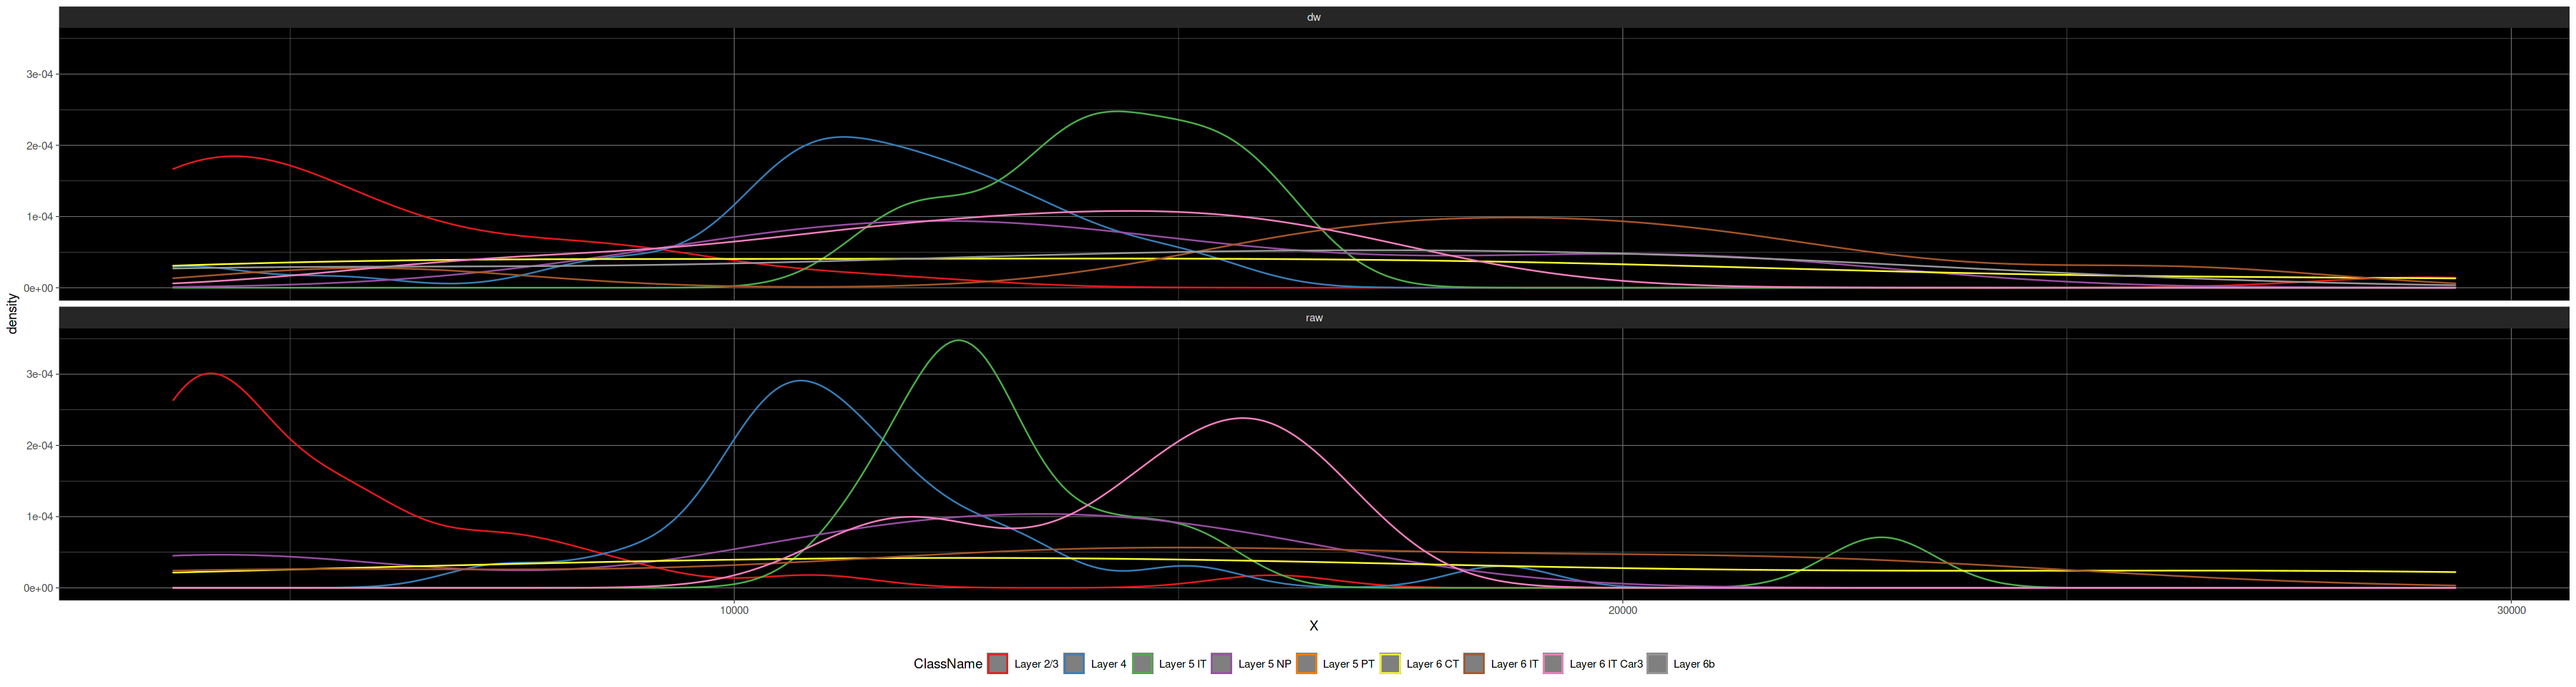

In [11]:
options(repr.plot.width=30, repr.plot.height=8)
ggplot(cell_data[ClassName != "Zero"][grepl("Layer", ClassName)], aes(X, color=ClassName)) +
    geom_density() + theme_dark() +
    theme(legend.position="bottom")+ guides(color=guide_legend(nrow=1)) +
    theme(panel.background=element_rect(fill="black")) +
    facet_wrap(~image_type, nrow=2) + scale_color_brewer(palette="Set1")

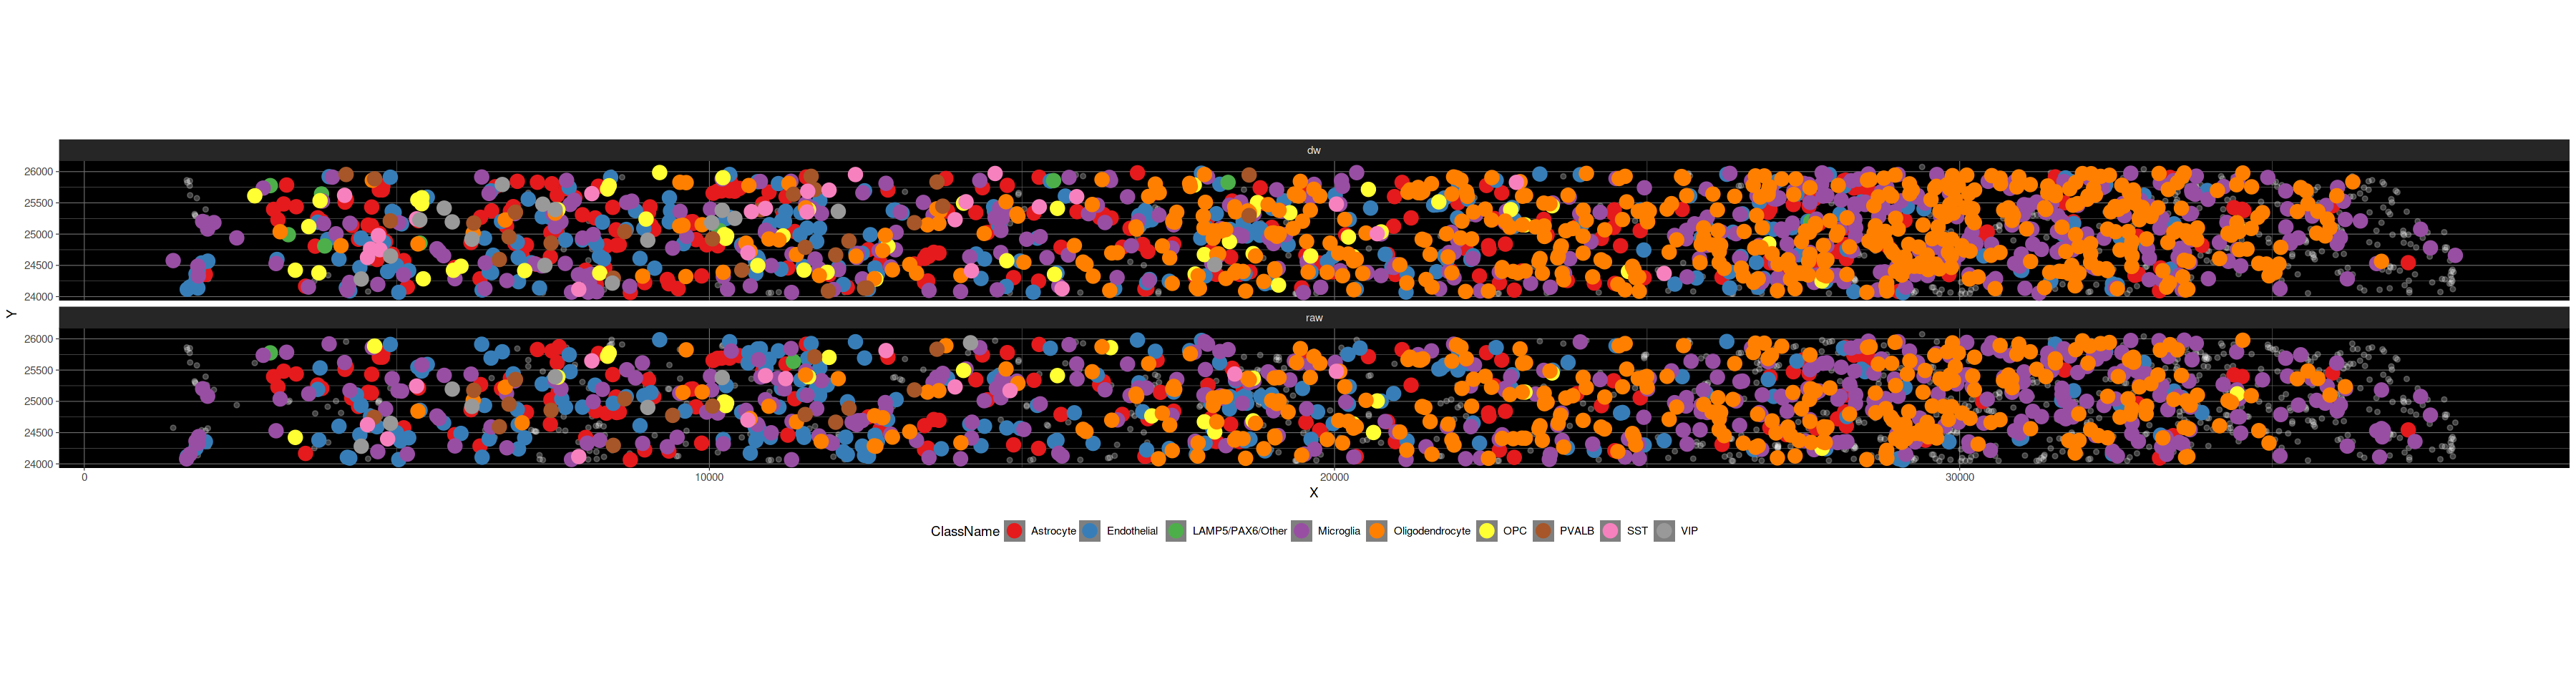

In [12]:
options(repr.plot.width=30, repr.plot.height=8)
ggplot(cell_data[ClassName != "Zero"][!grepl("Layer", ClassName)], aes(X, Y, color=ClassName)) +
    geom_point(data=cell_data[ClassName == "Zero"], color="white", alpha=.25) +
    geom_point(size=5) + theme_dark() +
    theme(legend.position="bottom") + coord_fixed() + guides(color=guide_legend(nrow=1)) +
    theme(panel.background=element_rect(fill="black")) +
    facet_wrap(~image_type, nrow=2) + scale_color_brewer(palette="Set1")

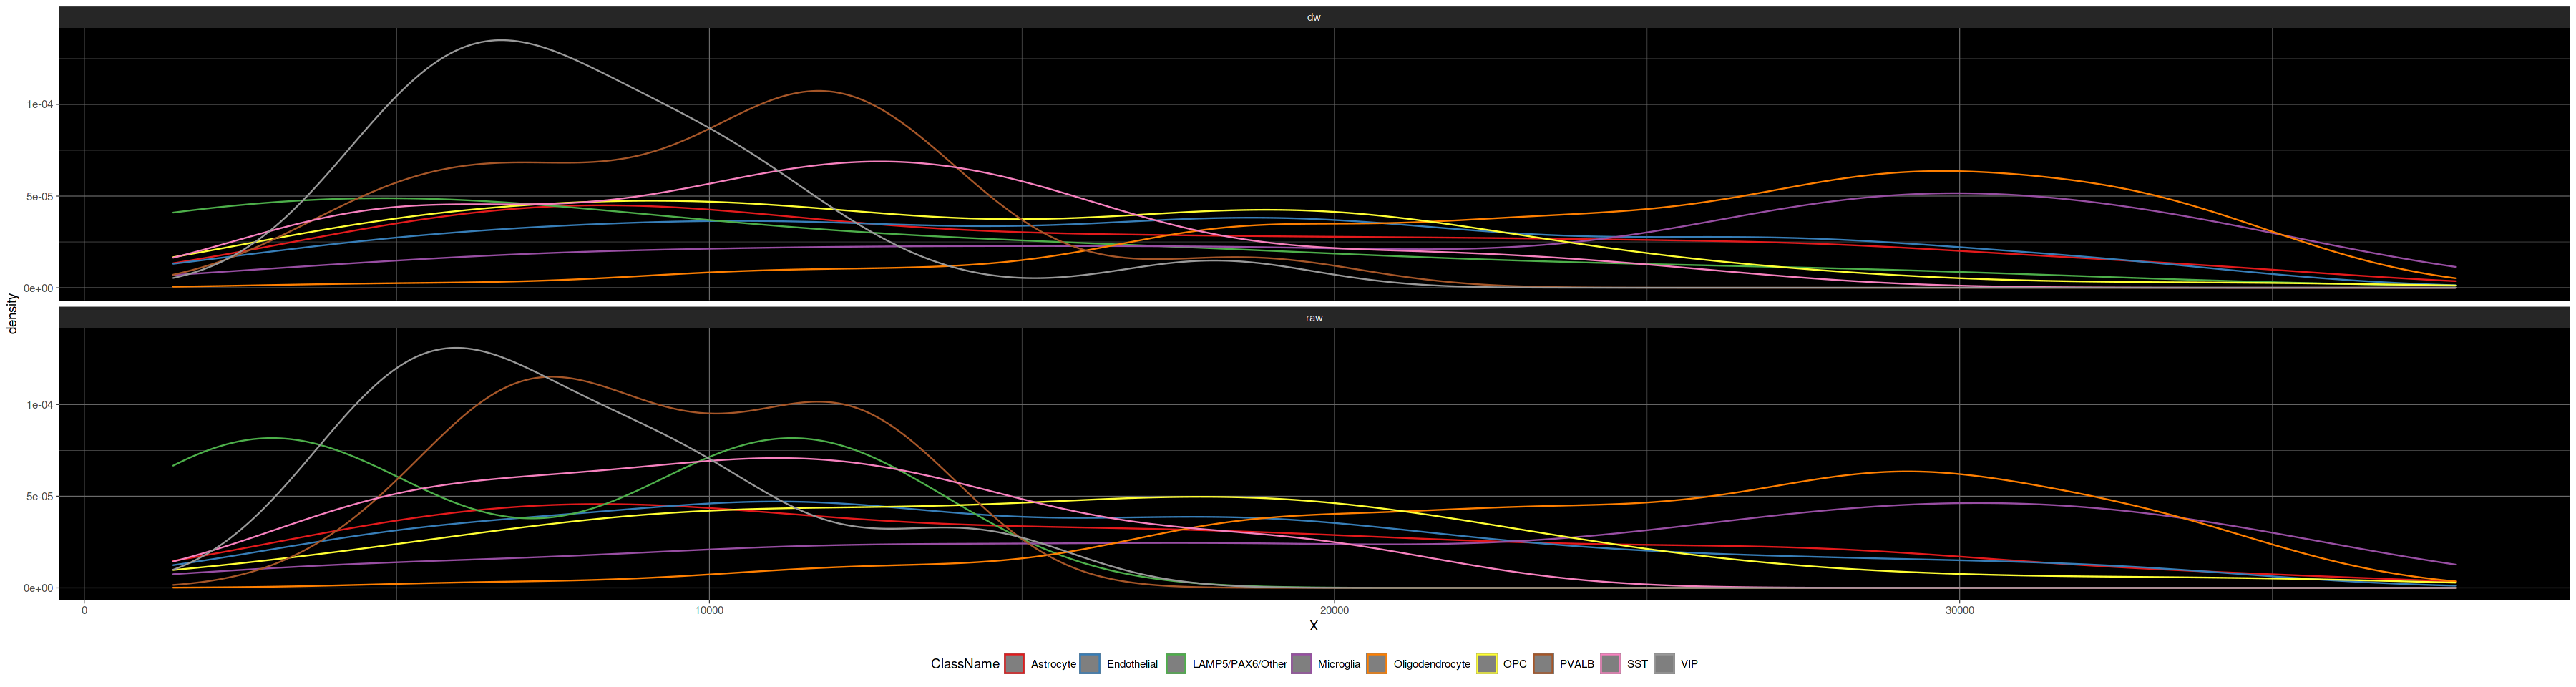

In [13]:
options(repr.plot.width=30, repr.plot.height=8)
ggplot(cell_data[ClassName != "Zero"][!grepl("Layer", ClassName)], aes(X, color=ClassName)) +
    geom_density() + theme_dark() +
    theme(legend.position="bottom")+ guides(color=guide_legend(nrow=1)) +
    theme(panel.background=element_rect(fill="black")) +
    facet_wrap(~image_type, nrow=2) + scale_color_brewer(palette="Set1")

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


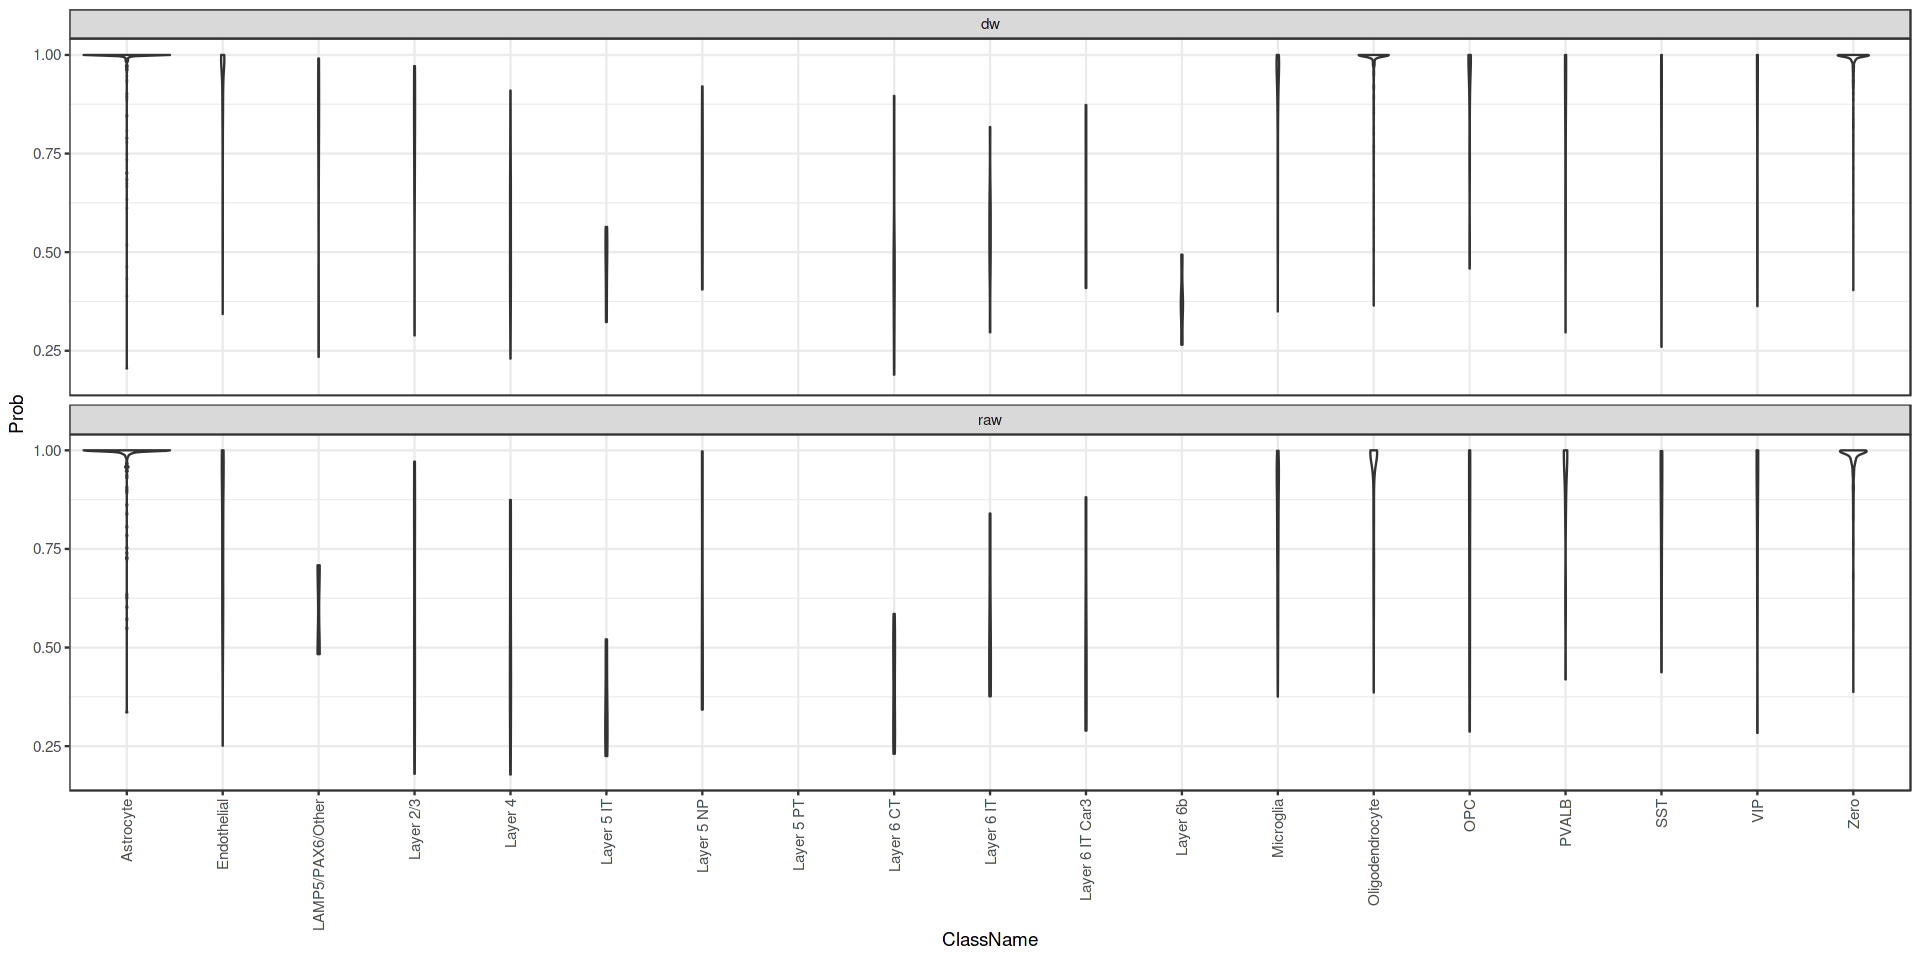

In [14]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(cell_data, aes(x=ClassName, y=Prob)) + geom_violin(trim=T) +
    facet_wrap(~image_type, nrow=2) + theme_bw() +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=.5))

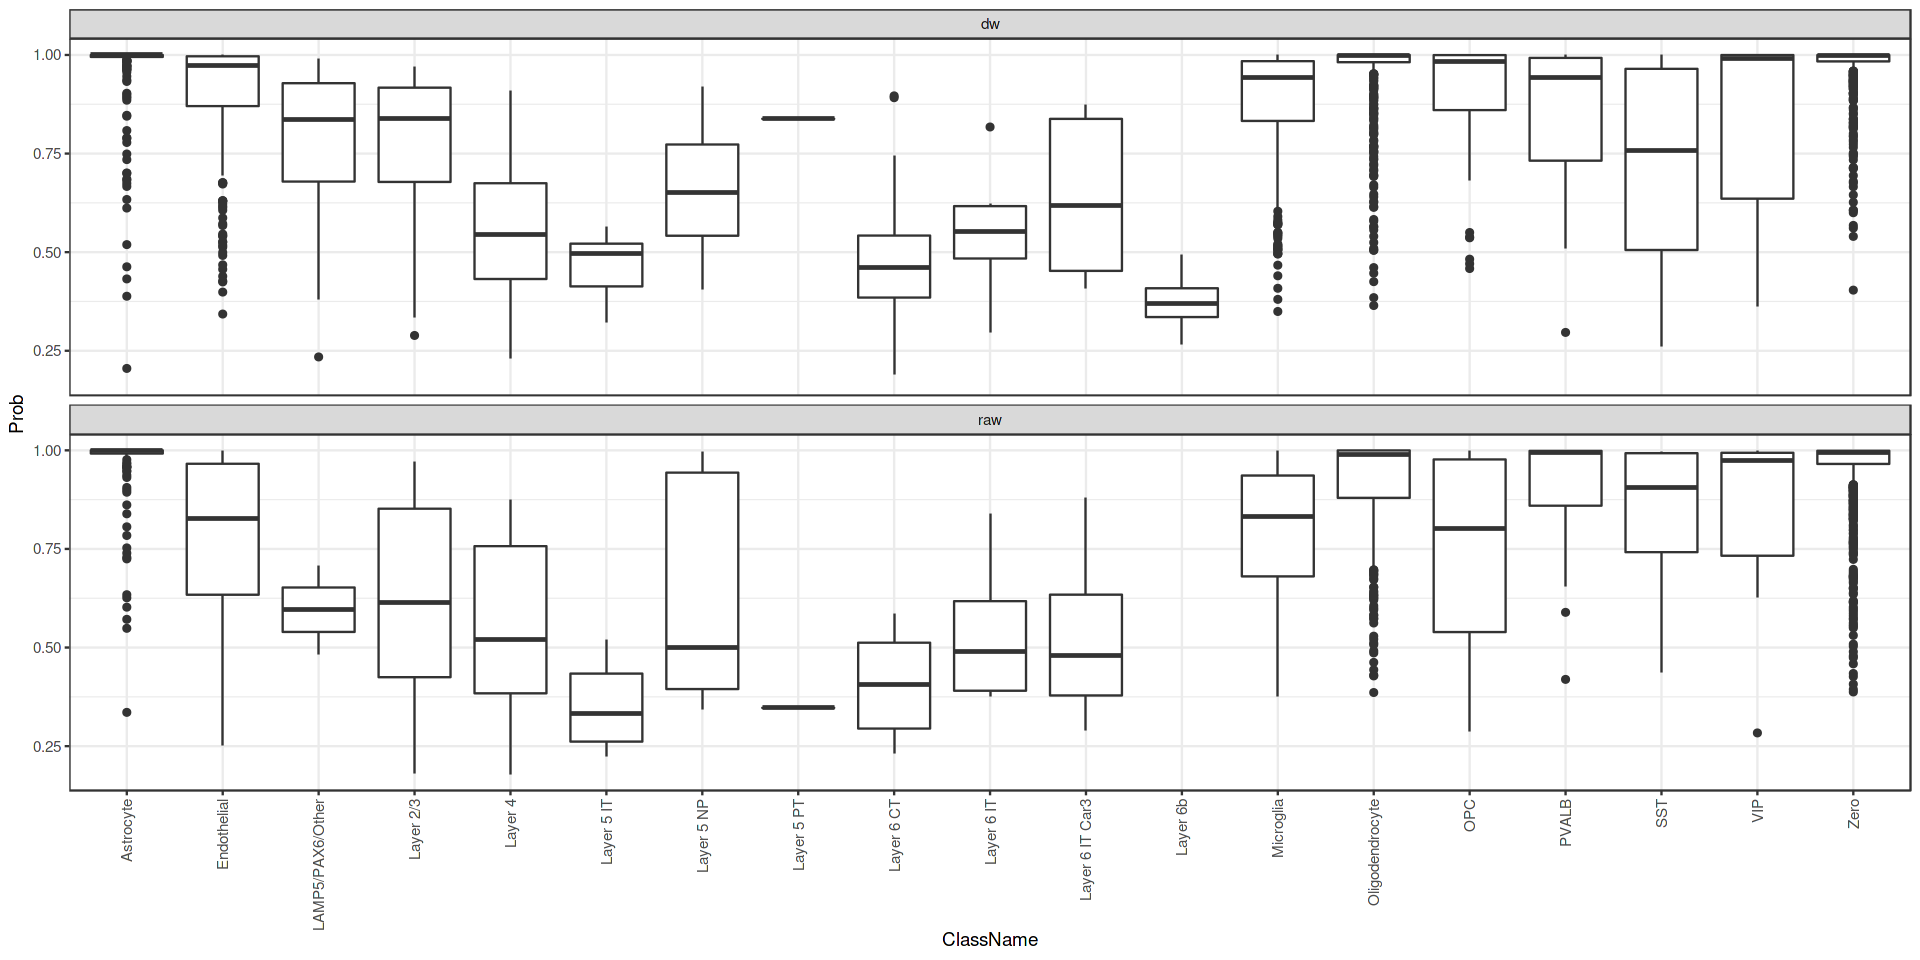

In [15]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(cell_data, aes(x=ClassName, y=Prob)) + geom_boxplot() +
    facet_wrap(~image_type, nrow=2) + theme_bw() +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=.5))

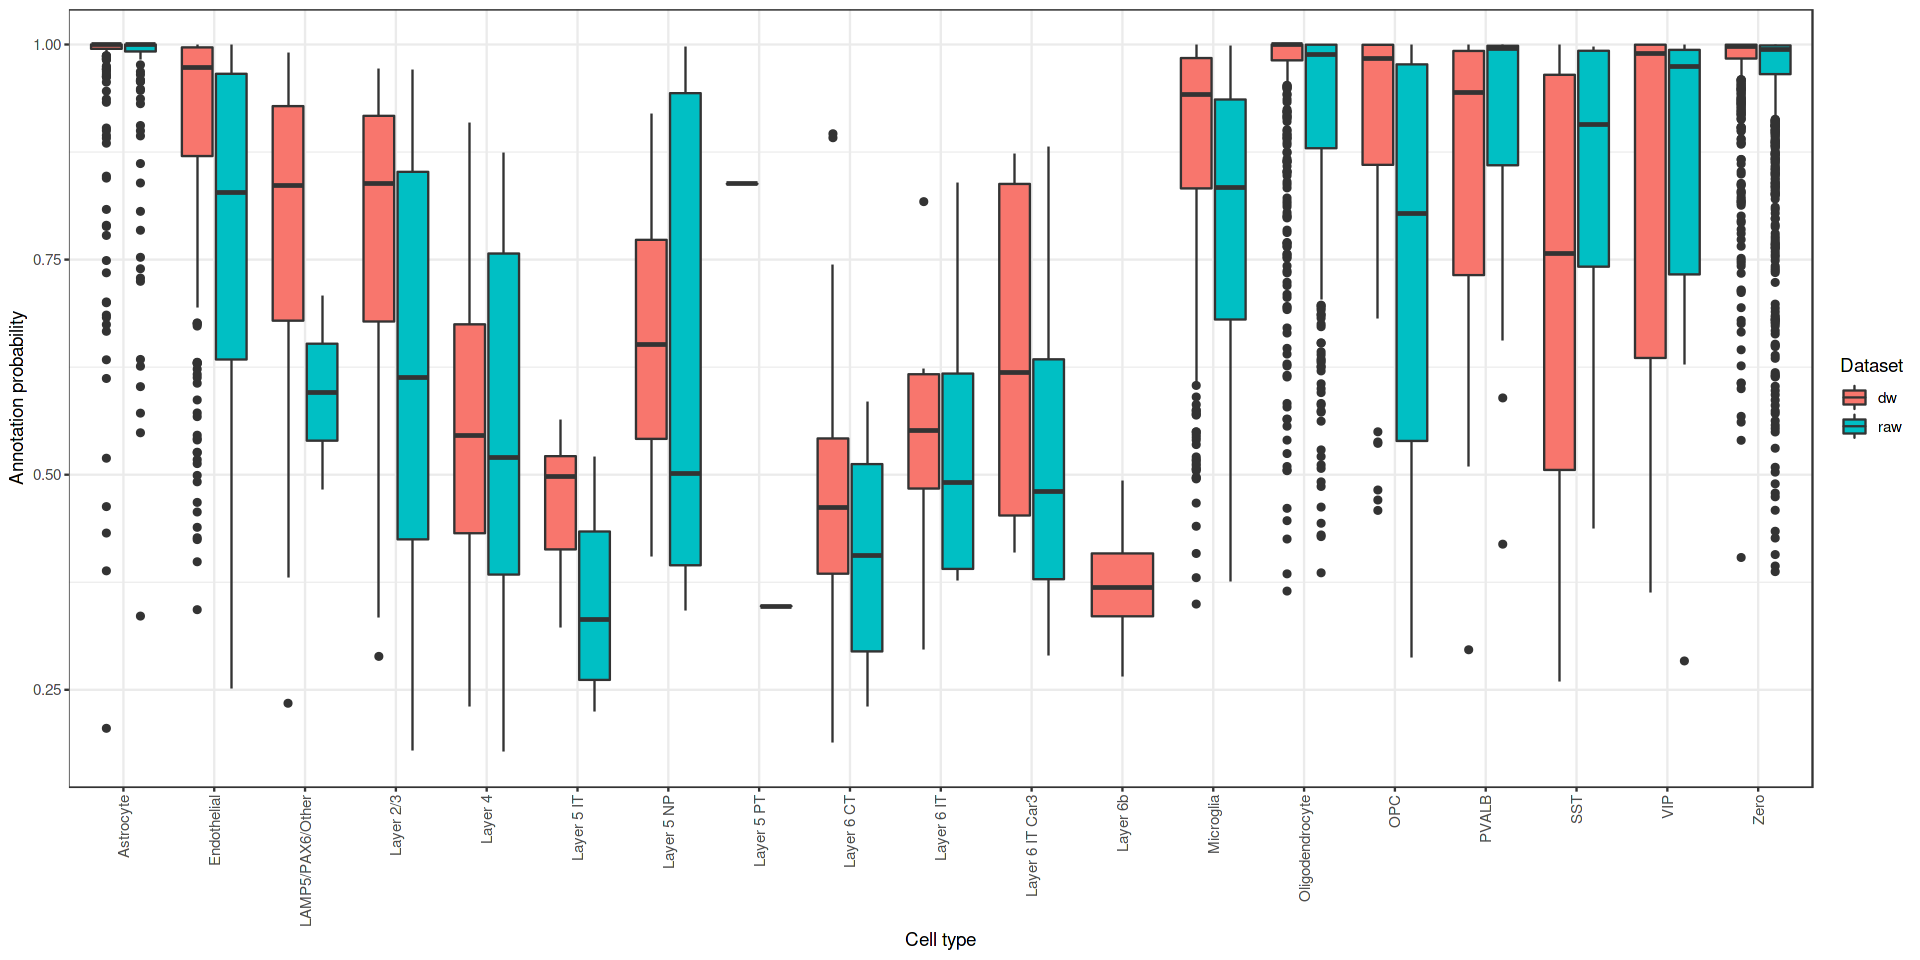

In [16]:
options(repr.plot.width=16, repr.plot.height=8)
p = ggplot(cell_data, aes(x=ClassName, y=Prob, fill=image_type)) + geom_boxplot() + theme_bw() +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=.5)) +
    labs(x="Cell type", y="Annotation probability", fill="Dataset")
print(p)
ggsave(plot=p, file="plots/cell_type.boxplots.png", width=16, height=8)

In [17]:
#options(repr.plot.width=16, repr.plot.height=8)
#ggplot(cell_data, aes(x=ClassName, y=Prob, fill=image_type)) + geom_violin(trim=T) + theme_bw() +
#    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=.5))

In [18]:
cell_counts = cell_data[, .N, by=c("ClassName", "image_type")]

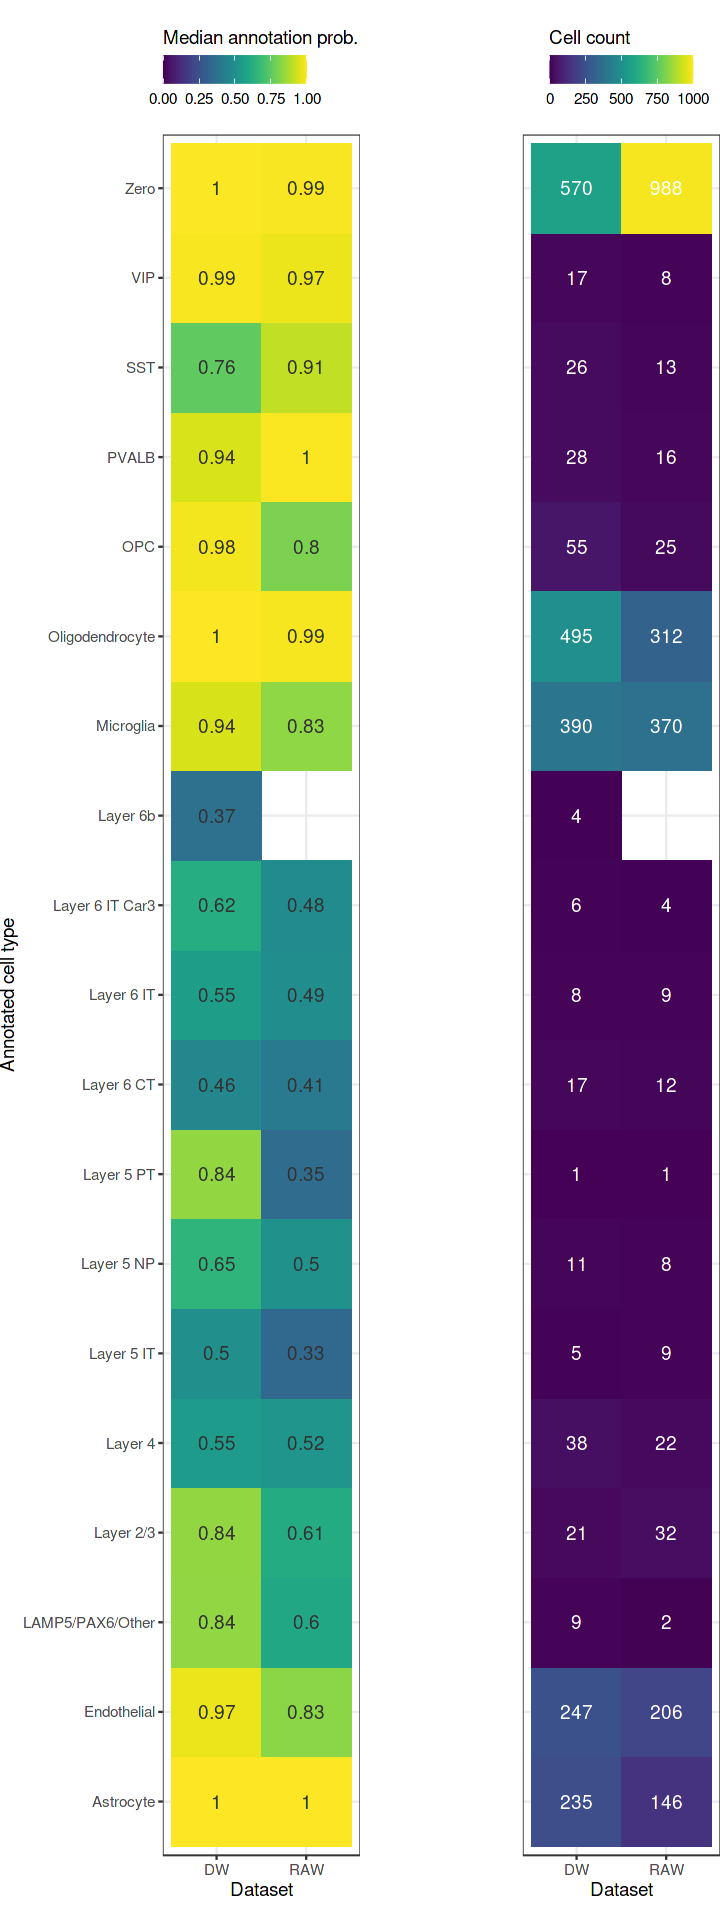

In [19]:
p1 = ggplot(cell_data[, .(pmedian=median(Prob)), by=c("ClassName", "image_type")],
      aes(y=ClassName, x=toupper(image_type))) +
    geom_tile(aes(fill=pmedian)) +
    scale_fill_viridis(limits=c(0, 1)) + theme_bw() + coord_fixed() +
    theme(legend.position="top", plot.margin=unit(c(0,0,0,0), "pt")) +
    guides(fill=guide_colorbar(title.position="top", barwidth=6)) +
    labs(x="Dataset", y="Annotated cell type", fill="Median annotation prob.") +
    geom_text(aes(label=round(pmedian, 2)), color="#323232")
p2 = ggplot(cell_counts, aes(y=ClassName, x=toupper(image_type))) +
    geom_tile(aes(fill=N)) +
    scale_fill_viridis(limits=c(0, 1000)) + theme_bw() + coord_fixed() +
    theme(legend.position="top", plot.margin=unit(c(0,0,0,0), "pt")) +
    guides(fill=guide_colorbar(title.position="top", barwidth=6)) +
    labs(x="Dataset", y="", fill="Cell count") +
    geom_text(aes(label=N), color="white") +
theme(axis.text.y=element_blank(), axis.ticks.y=element_blank())
options(repr.plot.width=6, repr.plot.height=16)
p = plot_grid(p1, p2, nrow=1, align="hv", rel_widths=c(1, 1))
print(p)
ggsave(plot=p, file="plots/median_annotation_probability.heatmap.png", width=6, height=16)

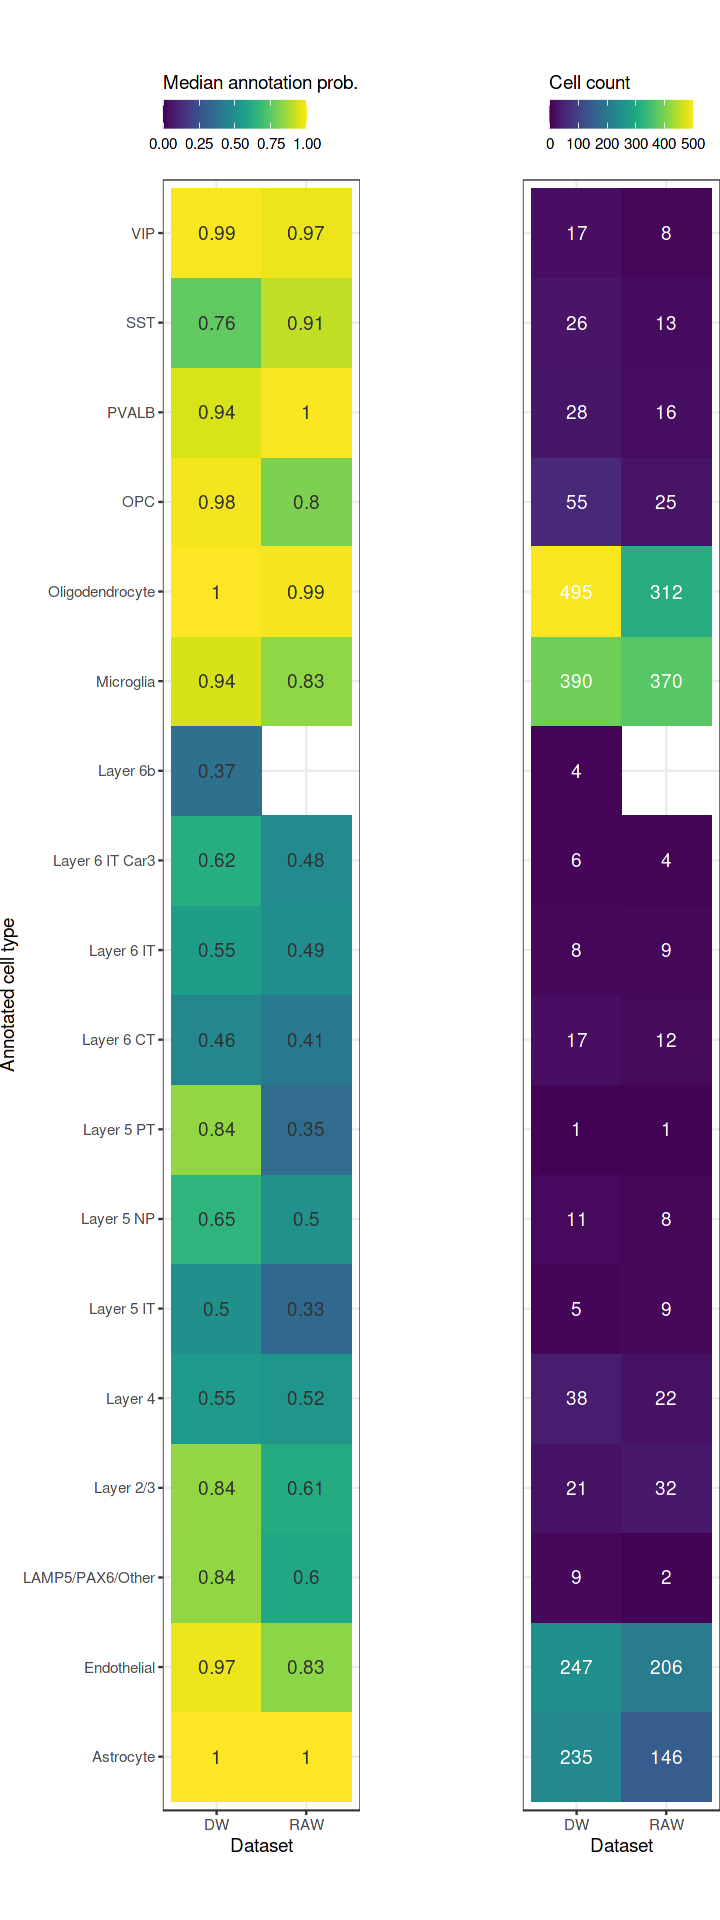

In [20]:
p1 = ggplot(cell_data[ClassName!="Zero", .(pmedian=median(Prob)), by=c("ClassName", "image_type")],
      aes(y=ClassName, x=toupper(image_type))) +
    geom_tile(aes(fill=pmedian)) +
    scale_fill_viridis(limits=c(0, 1)) + theme_bw() + coord_fixed() +
    theme(legend.position="top", plot.margin=unit(c(0,0,0,0), "pt")) +
    guides(fill=guide_colorbar(title.position="top", barwidth=6)) +
    labs(x="Dataset", y="Annotated cell type", fill="Median annotation prob.") +
    geom_text(aes(label=round(pmedian, 2)), color="#323232")
p2 = ggplot(cell_counts[ClassName!="Zero"], aes(y=ClassName, x=toupper(image_type))) +
    geom_tile(aes(fill=N)) +
    scale_fill_viridis(limits=c(0, 500)) + theme_bw() + coord_fixed() +
    theme(legend.position="top", plot.margin=unit(c(0,0,0,0), "pt")) +
    guides(fill=guide_colorbar(title.position="top", barwidth=6)) +
    labs(x="Dataset", y="", fill="Cell count") +
    geom_text(aes(label=N), color="white") +
theme(axis.text.y=element_blank(), axis.ticks.y=element_blank())
options(repr.plot.width=6, repr.plot.height=16)
p = plot_grid(p1, p2, nrow=1, align="hv", rel_widths=c(1, 1))
print(p)
ggsave(plot=p, file="plots/median_annotation_probability.noZeros.heatmap.png", width=6, height=16)

Warning message:
“Removed 1 rows containing missing values (position_stack).”


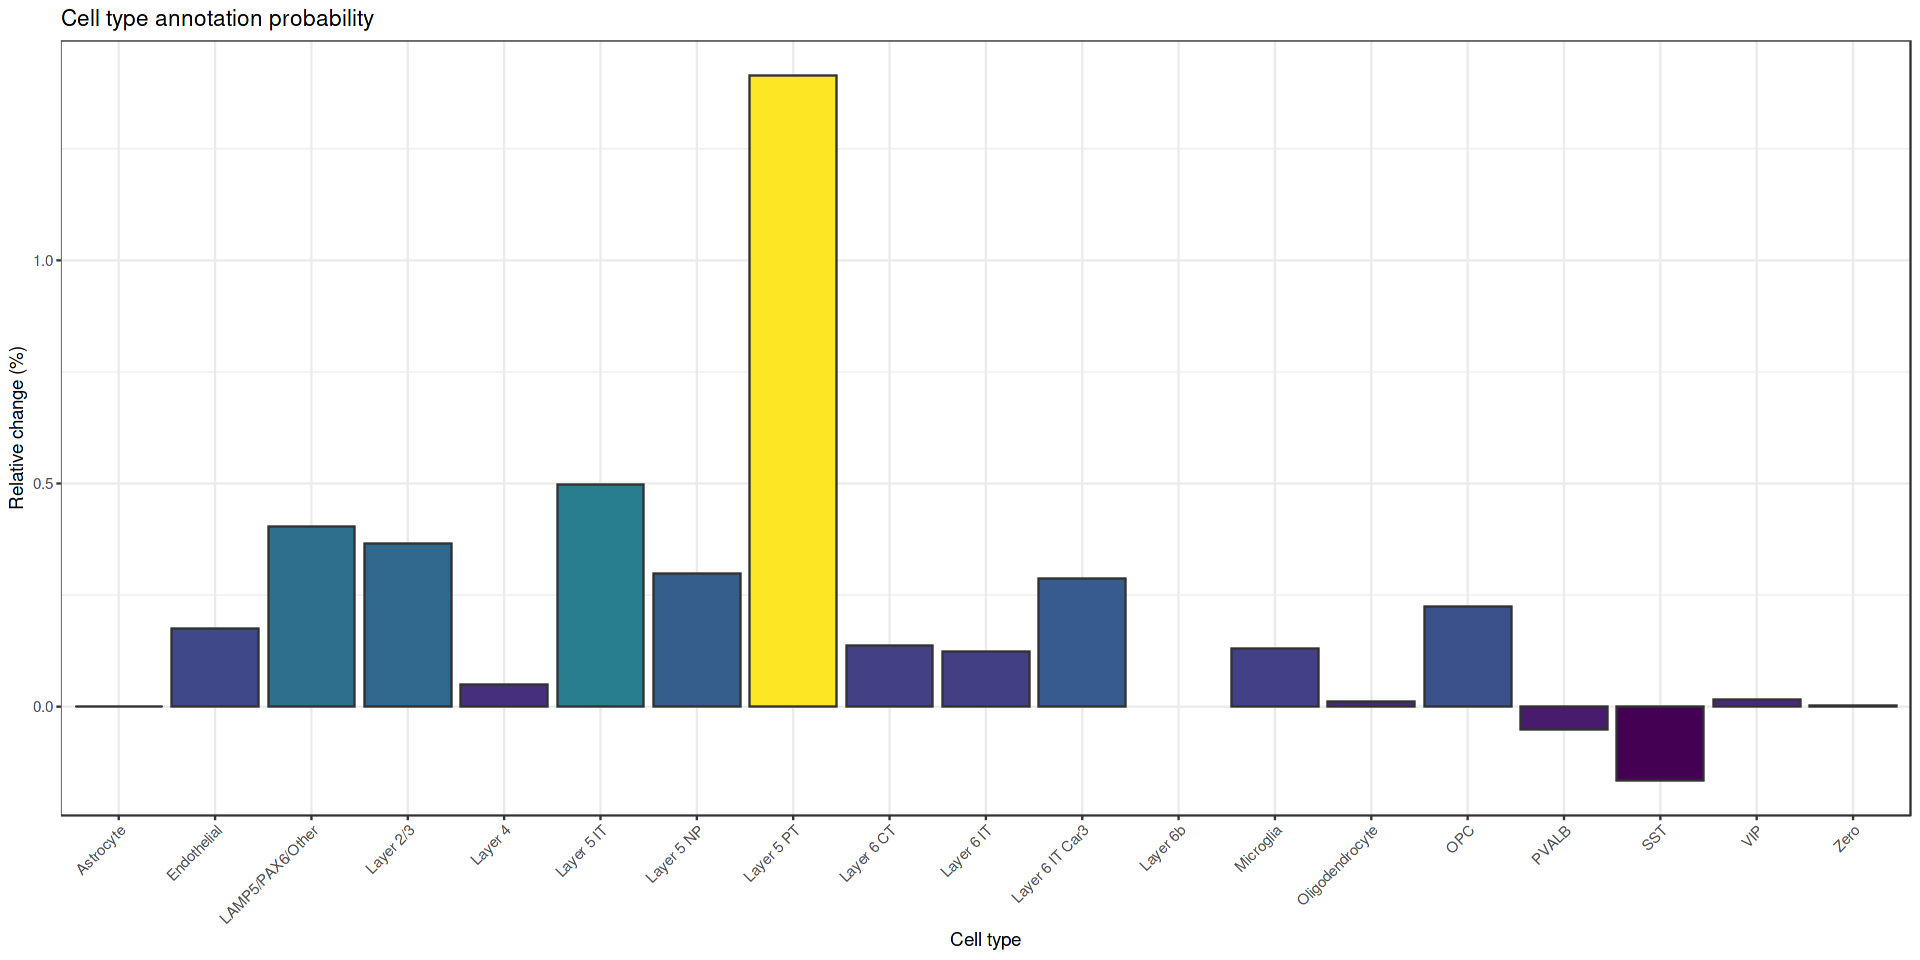

In [41]:
ggplot(dcast(cell_data[, .(pmedian=median(Prob)), by=c("ClassName", "image_type")], ClassName~image_type, value.var="pmedian")[, .(ClassName, reldelta=dw/raw-1)]) +
    geom_col(aes(x=ClassName, y=reldelta, fill=reldelta*100), color="#323232") +
    theme_bw() + scale_fill_viridis() + theme(axis.text.x=element_text(angle=45, hjust=1)) +
    labs(x="Cell type", y="Relative change (%)", title="Cell type annotation probability") + guides(fill="none")

In [21]:
cell_data[, .(image_type, assigned="Zero" != ClassName)][, .N, by=c("image_type", "assigned")]
print(1613+570)

image_type,assigned,N
<chr>,<lgl>,<int>
dw,TRUE,1613
dw,FALSE,570
raw,TRUE,1195
raw,FALSE,988


[1] 2183


In [22]:
fwrite(dcast(cell_data[, .N, by=c("ClassName", "image_type")], ClassName~image_type, value.var="N"), "../data/cell_type.annotation.count.tsv", sep="\t")

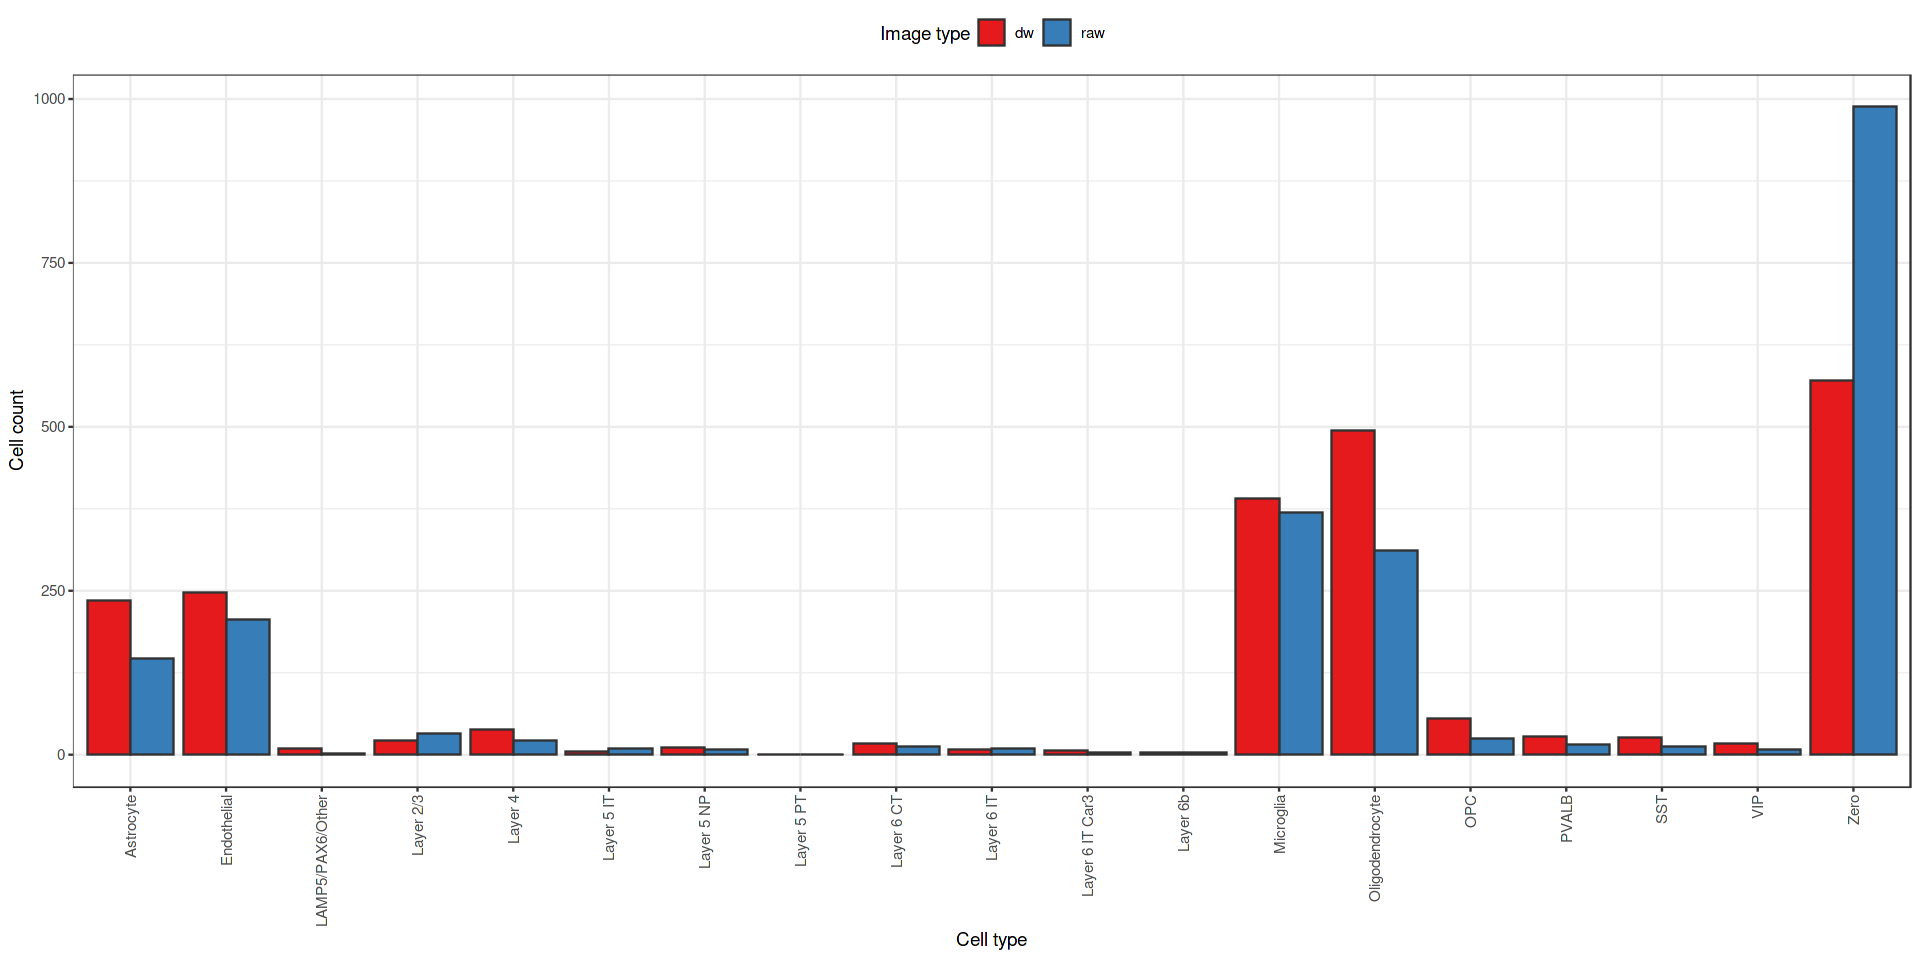

In [27]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(cell_data[, .N, by=c("ClassName", "image_type")], aes(x=ClassName, y=N, fill=image_type)) +
    geom_col(position="dodge", color="#323232") +
    theme_bw() + theme(legend.position="top", axis.text.x=element_text(angle=90, hjust=1, vjust=.5)) +
    scale_fill_brewer("Image type", palette="Set1") + labs(x="Cell type", y="Cell count")

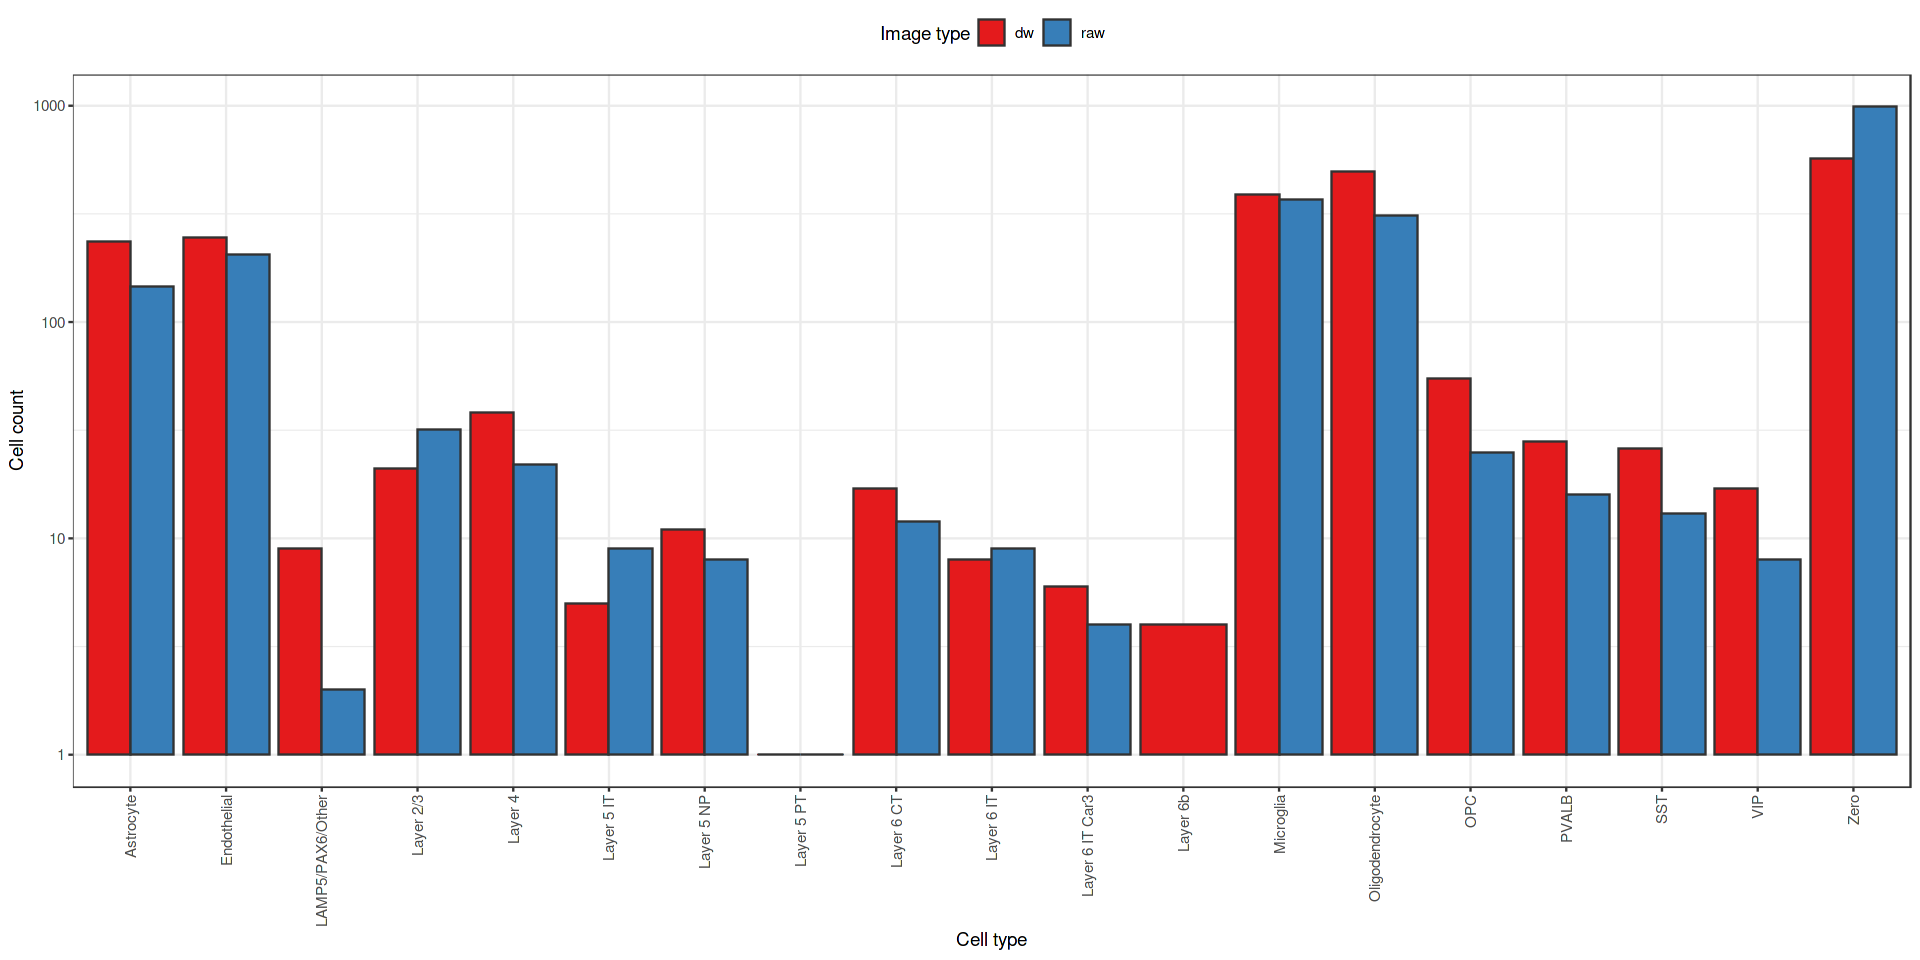

In [28]:
ggplot(cell_data[, .N, by=c("ClassName", "image_type")], aes(x=ClassName, y=N, fill=image_type)) +
    geom_col(position="dodge", color="#323232") +
    scale_y_log10() + theme_bw() + theme(legend.position="top", axis.text.x=element_text(angle=90, hjust=1, vjust=.5)) +
    scale_fill_brewer("Image type", palette="Set1") + labs(x="Cell type", y="Cell count")

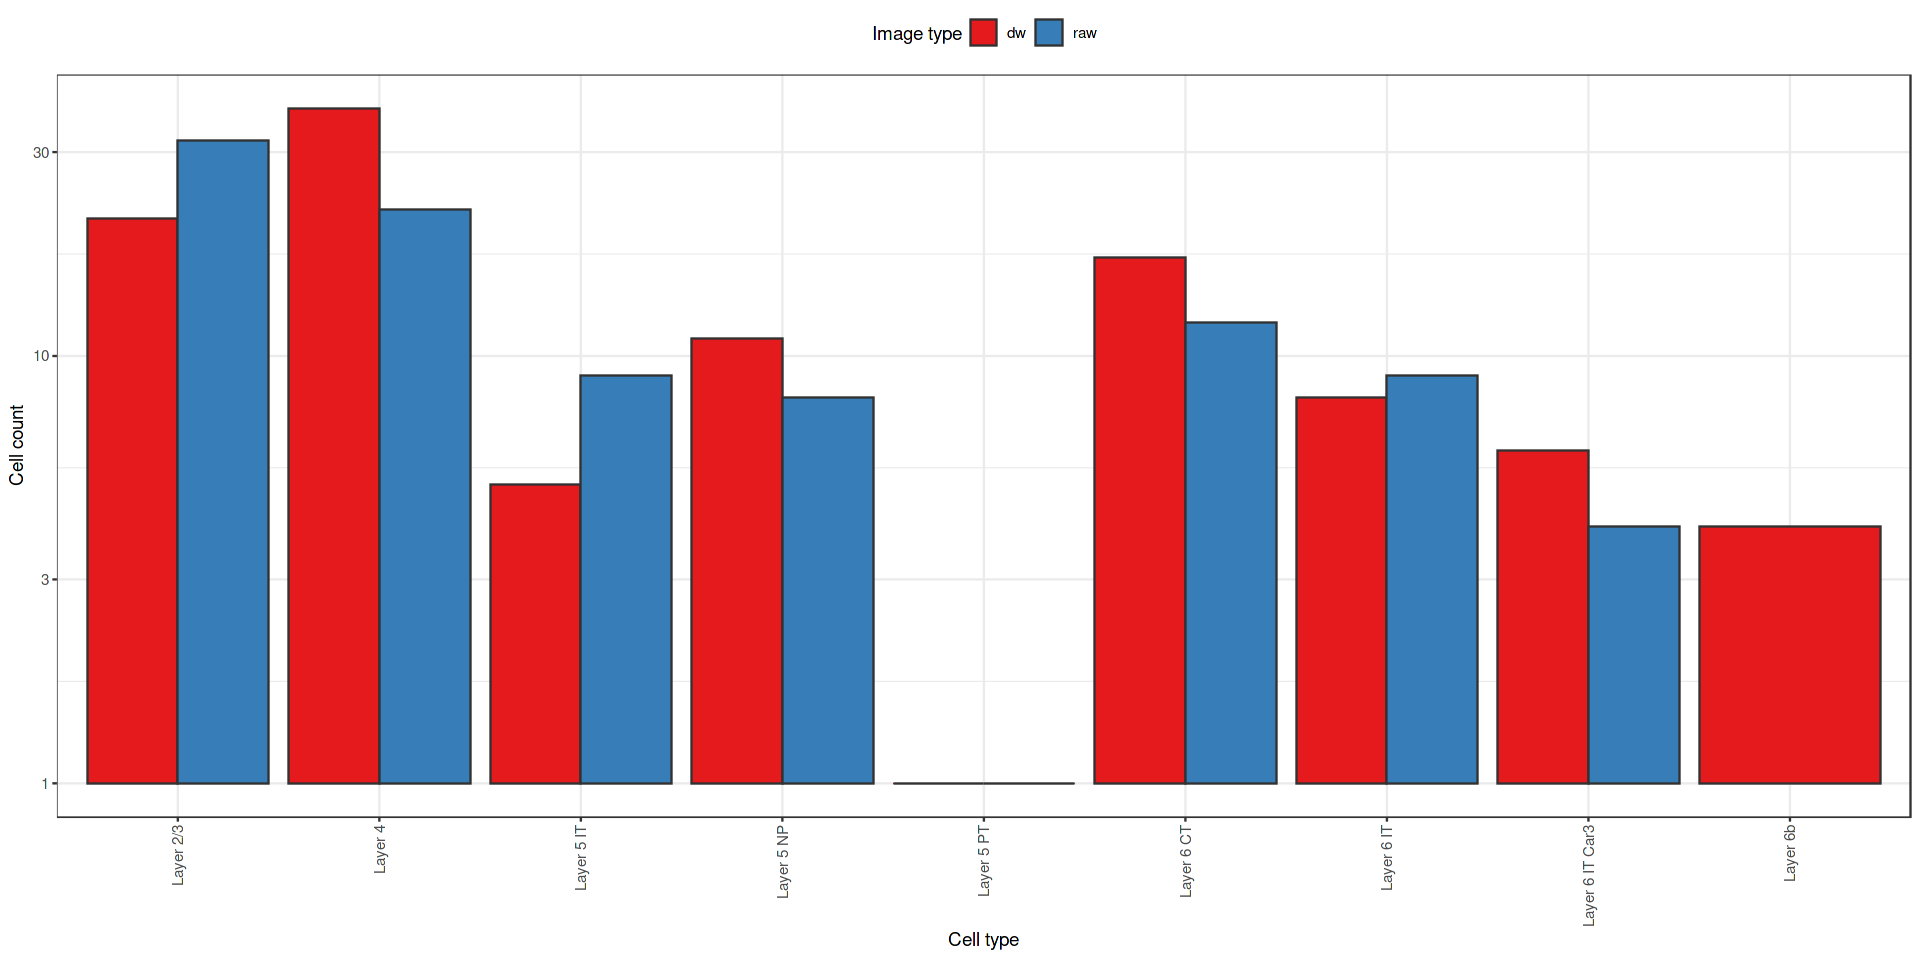

In [29]:
ggplot(cell_data[grepl("Layer", ClassName), .N, by=c("ClassName", "image_type")], aes(x=ClassName, y=N, fill=image_type)) +
    geom_col(position="dodge", color="#323232") +
    scale_y_log10() + theme_bw() + theme(legend.position="top", axis.text.x=element_text(angle=90, hjust=1, vjust=.5)) +
    scale_fill_brewer("Image type", palette="Set1") + labs(x="Cell type", y="Cell count")

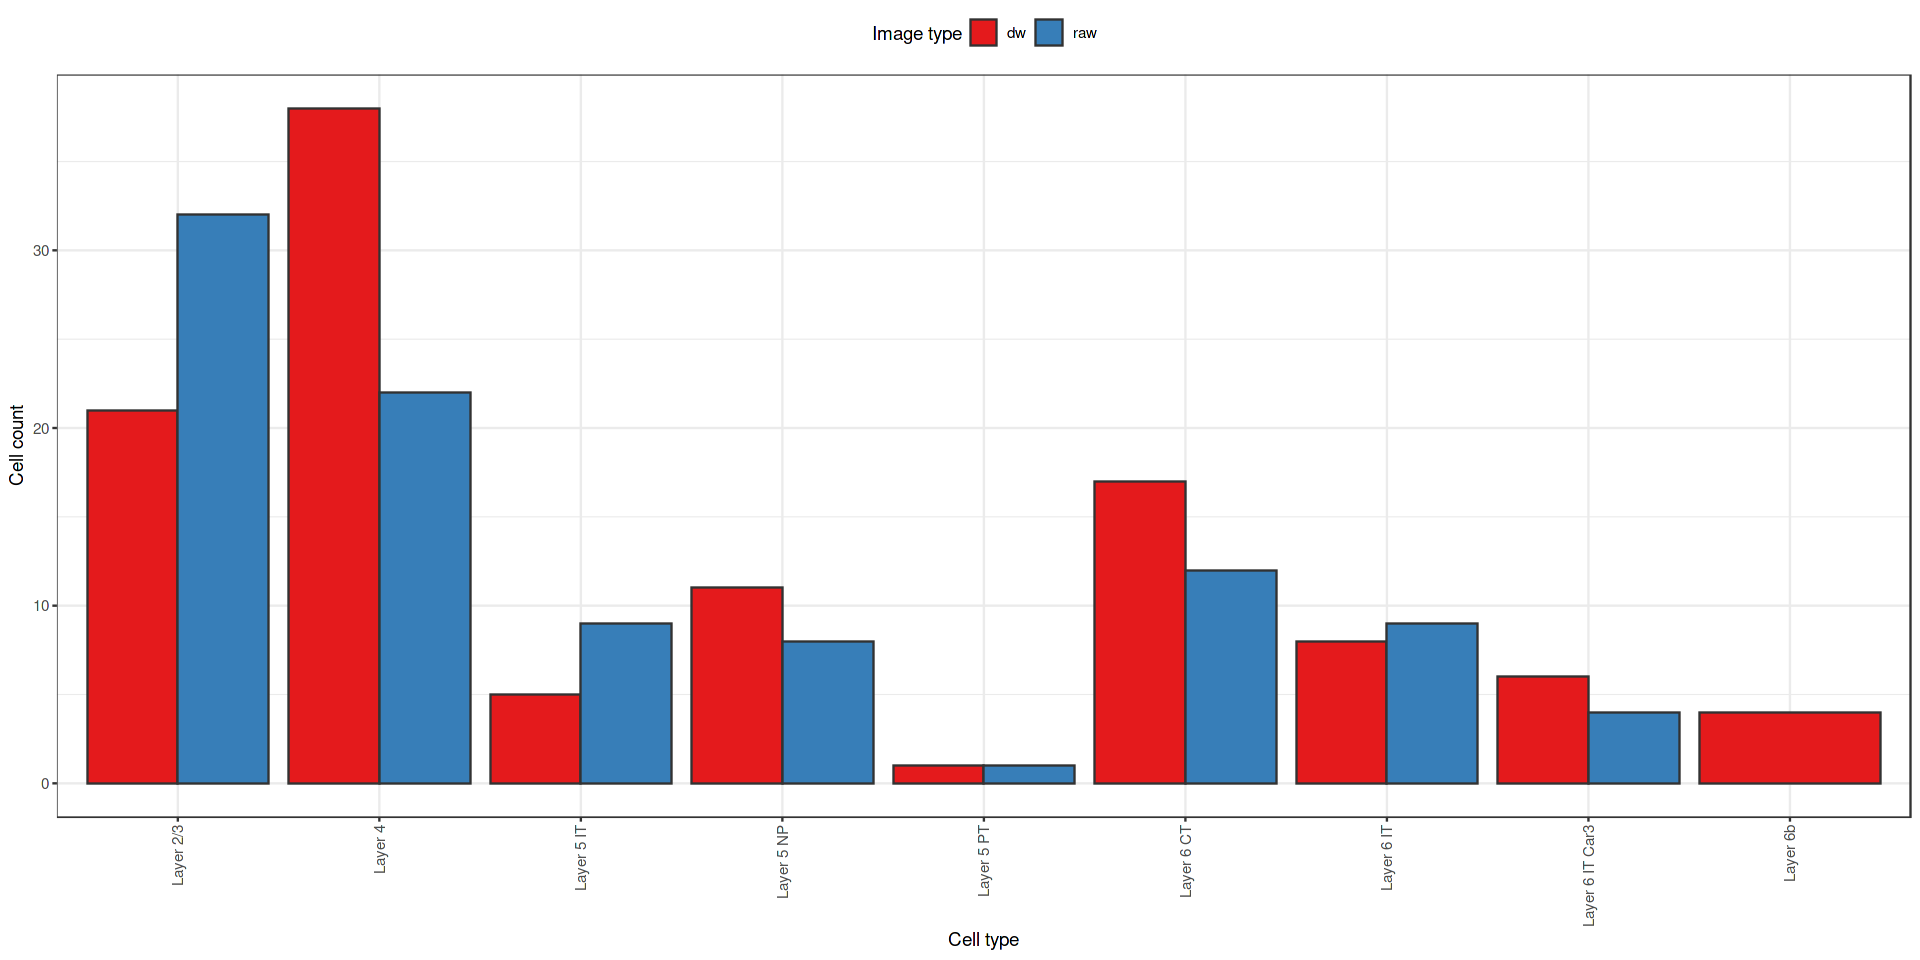

In [30]:
ggplot(cell_data[grepl("Layer", ClassName), .N, by=c("ClassName", "image_type")], aes(x=ClassName, y=N, fill=image_type)) +
    geom_col(position="dodge", color="#323232") +
    theme_bw() + theme(legend.position="top", axis.text.x=element_text(angle=90, hjust=1, vjust=.5)) +
    scale_fill_brewer("Image type", palette="Set1") + labs(x="Cell type", y="Cell count")